<h1 style="color:orange">INFERENTIAL STATISTICS</h1>

- Staistical Inference
- Hypothesis testing
- Hypothesis testing in the presence of two samples






# PART 1 - Statistical Inference

## Demonstration of unbiased estimators

Given a sample of n independent and identically distributed observations, demonstrate that the sample mean $\bar{X}$ and the sample variance $S^2$ are unbiased estimators

Exercise T1 (solution) (1/2)

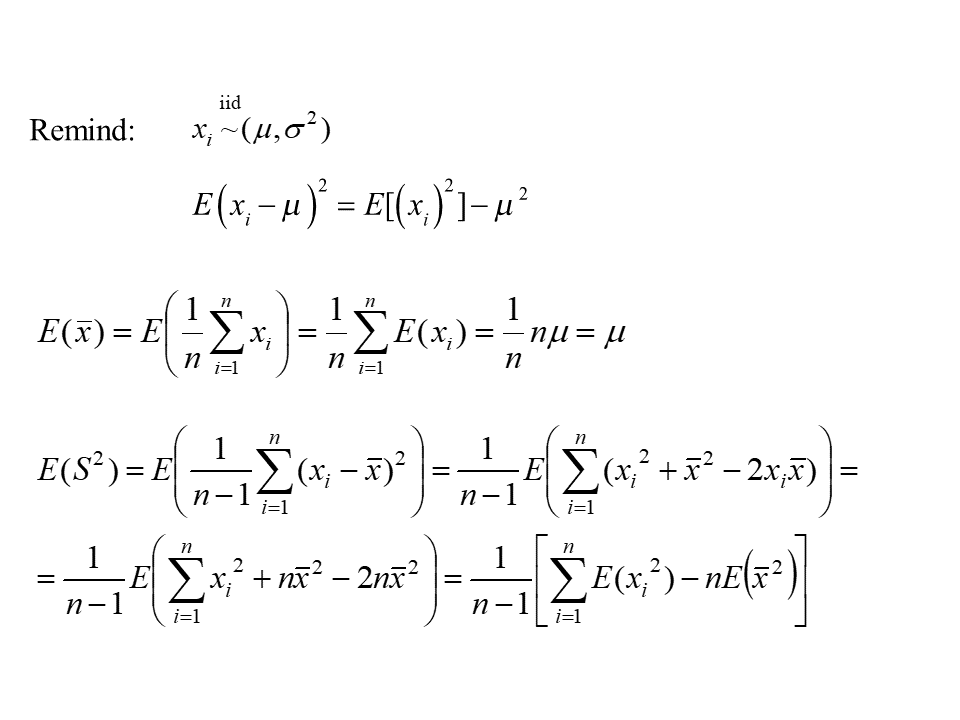

Exercise T1 (solution) (2/2)

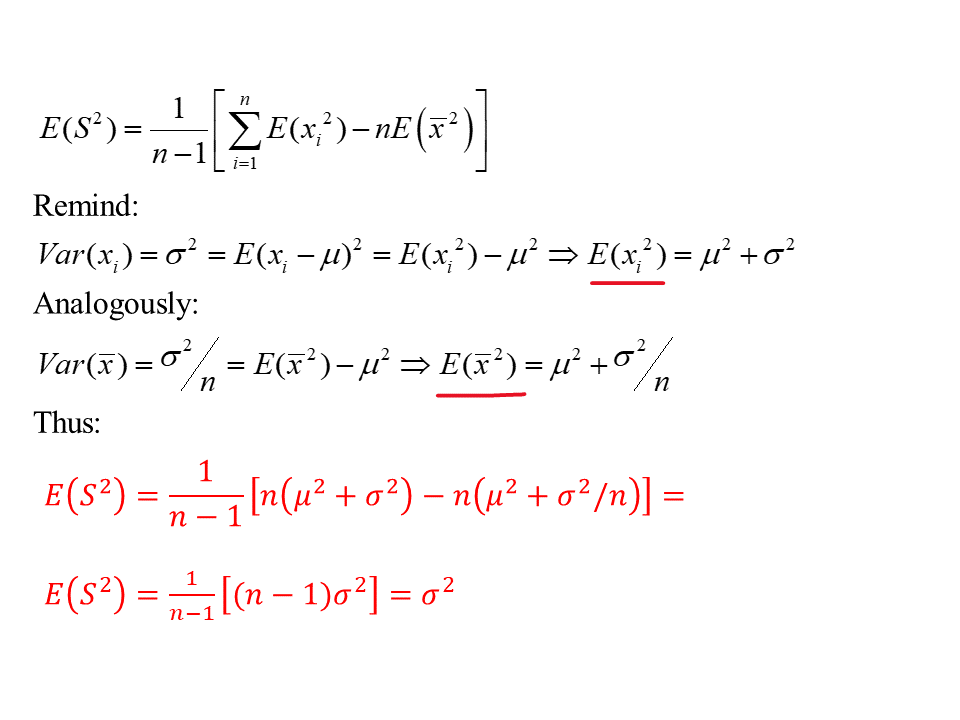

## EX1.1 - Calculation of Probabilities from a Sample distribution

A synthetic fiber used in manufacturing industry has an ultimate tensile strength that is normally distributed with mean 75.5 psi and standard deviation 3.5 psi. 

a) Compute the probability that a random sample of 6 observations has a sample mean larger than 75.75 psi.

b) How does the standard deviation of the mean estimator change by passing from a sample of 6 observations to a sample of 49 observations?

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy
print(scipy.__version__)

1.7.3


In [2]:
# Input data
mu = 75.5       # Mean
sigma = 3.5     # Standard deviation

### Point a

Compute the probability that a random sample of 6 observations has a sample mean larger than 75.75 psi.

In [3]:
n = 6          # Number of samples
mu0 = 75.75    # Hypothesized mean

# Under the assumption of normality, the probability of observing a sample mean larger than mu0 is: 
Z_0 = (mu0 - mu)/(sigma/np.sqrt(n))
prob = 1 - stats.norm.cdf(Z_0)
print('The probability of observing a sample mean larger than mu0 is: %.3f' % prob)


The probability of observing a sample mean larger than mu0 is: 0.431


In [4]:
prob2 = 1 - stats.norm.cdf(mu0, mu, sigma/np.sqrt(n))
print('The probability of observing a sample mean larger than mu0 is: %.3f' % prob2)

The probability of observing a sample mean larger than mu0 is: 0.431


### Point b

How does the standard deviation of the mean estimator change by passing from a sample of 6 observations to a sample of 49 observations?

In [5]:
n_new = 49      # Number of samples

sigma_n = sigma/np.sqrt(n)              # Standard deviation of the mean with n = 6 samples
sigma_n_new = sigma/np.sqrt(n_new)      # Standard deviation of the mean with n = 49 samples

print('The standard deviation of the mean with n = 6 samples is: %.3f psi' % sigma_n)
print('The standard deviation of the mean with n = 49 samples is: %.3f psi' % sigma_n_new)

print('The difference between the two standard deviations is: %.3f psi' % (sigma_n_new - sigma_n))

The standard deviation of the mean with n = 6 samples is: 1.429 psi
The standard deviation of the mean with n = 49 samples is: 0.500 psi
The difference between the two standard deviations is: -0.929 psi


In [6]:
prob_new = 1 - stats.norm.cdf(mu0, mu, sigma_n_new)
print('With 49 samples, the probability of observing a sample mean larger than mu0 is: %.3f' % prob_new)

With 49 samples, the probability of observing a sample mean larger than mu0 is: 0.309


## EX1.2 - Probability Distribution of the Difference between two samples 

A random sample of size 16 is drawn from a normal population with mean 75 and standard deviation 8. A second sample of size 9 is drawn from a normal population with mean 70 and standard deviation 12.

a) Compute the probability that the sample mean difference between the first and the second sample is greater than 4 (assume that the two populations are independent).

b) Compute the probability that the sample mean difference between the first and the second sample ranges between 3.5 and 5.5 (same assumption).

In [7]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
# Input data
n1 = 16          # Number of samples
mu1 = 75         # Mean
sigma1 = 8       # Standard deviation

n2 = 9           # Number of samples
mu2 = 70         # Mean
sigma2 = 12      # Standard deviation

### Point a

Compute the probability that the sample mean difference between the first and the second sample is greater than 4 (assume that the two populations are independent).

In [9]:
# Answer to point a
# Compute the mean and the variance of the difference between the two populations
mu_diff = mu1 - mu2 
sigma_diff = np.sqrt(sigma1**2/n1 + sigma2**2/n2)   # the operator ** stands for ^ (i.e., power of)

mu0 = 4       # Difference between the means

# P(X1 - X2 > mu0) = P(Z > (mu0 - mu_diff)/sigma_diff), we normalize to Z the test required, see above.
prob = 1 - stats.norm.cdf((mu0 - mu_diff)/sigma_diff)

print('Probability of the difference between the means being greater than %.1f is %.4f' % (mu0, prob))


Probability of the difference between the means being greater than 4.0 is 0.5885


In [10]:
prob_ns = 1 - stats.norm.cdf(mu0, mu_diff, sigma_diff)
print('Probability of the difference between the means being greater than %.1f is %.4f' % (mu0, prob_ns))

Probability of the difference between the means being greater than 4.0 is 0.5885


### Point b

Compute the probability that the sample mean difference between the first and the second sample ranges between 3.5 and 5.5 (same assumption).


In [11]:
# Answer to point b
lower_bound = 3.5      # Lower bound of the interval
upper_bound = 5.5      # Upper bound of the interval

# P(lower_bound < X1 - X2 < upper_bound) = P(X1 - X2 < upper_bound) - P(X1 - X2 < lower_bound)
prob = stats.norm.cdf((upper_bound - mu_diff)/sigma_diff) - stats.norm.cdf((lower_bound - mu_diff)/sigma_diff)

print('Probability of the difference between the means being between %.1f and %.1f is %.4f' % (lower_bound, upper_bound, prob))

Probability of the difference between the means being between 3.5 and 5.5 is 0.1759


# PART 2 - Hypothesis testing

## One-sample Z-test

**Assumptions** 
- $X_1, X_2, ..., X_n$ is a random sample of size $n$ from a population.
- Population is **normal**.
- The **variance** of the population is **known**. 

Under those assumptions, the quantity $Z$ follows a standard normal distribution $N(0,1)$.
$$ Z = \frac{\bar{X} - \mu}{{\sigma}/{\sqrt{n}}} $$


**Null hypothesis:**
$H_0: \mu = \mu_0$

Where:
- $\mu$ is the population mean
- $\mu_0$ is the hypothesized population mean


**Test statistic:** 
$ Z_0 = \frac{\bar{X} - \mu_0}{{\sigma}/{\sqrt{n}}} $

<center>

| Alternative hypotheses | Rejection criterion |
|----------|----------|
| $H_1: \mu \neq \mu_0$ | $\|Z_0\| > z_{\alpha/2}$|
| $H_1: \mu > \mu_0$ | $Z_0 > z_{\alpha}$|
| $H_1: \mu < \mu_0$ | $Z_0 < -z_{\alpha}$|
</center>


### `scipy.stats` for hypothesis testing

The `scipy.stats` library contains several functions for performing the most common hypothesis testing. 

In [12]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the library for hypothesis testing scipy
import scipy.stats as stats

# One simple example...
mu = 10     # mean
sigma = 1   # standard deviation
n = 10    # sample size

# Generate the random sample
np.random.seed(230315)
x1 = np.random.normal(mu, sigma, n)


In [13]:
# Choose the mean of the null hypothesis
mu0 = 10.1

# Calculate the Z-statistic
Z_0 = (np.mean(x1) - mu0) / (sigma / np.sqrt(n))

print('Test statistic Z_0 = %.3f' % Z_0)

Test statistic Z_0 = -0.491


Let's test $H_0$ against $H_1: \mu \neq \mu_0$.

In [14]:
# Compare the Z-statistic with the critical value
alpha = 0.05   # significance level
z_alpha2 = stats.norm.ppf(1-alpha/2)    #remind: inverse cumulative distribution function 
print('Rejection Region Limit = %.3f' % z_alpha2)
if np.abs(Z_0) > z_alpha2:
    print('Reject the null hypothesis at alpha = %.2f' % alpha)
else:
    print('Accept the null hypothesis at alpha = %.2f' % alpha)

# Z_0 is inside the ok region, which is delimited by Z<-1.960 and Z>1.960

Rejection Region Limit = 1.960
Accept the null hypothesis at alpha = 0.05


$Z_0$ is inside the ok region, which is delimited by Z<-1.960 and Z>1.960

We can also compute the corresponding confidence interval as:
$$\bar{X} -  Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}} \leq \mu \leq \bar{X} +  Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}$$


In [15]:
# Compute the confidence interval
CI = [np.mean(x1) - z_alpha2 * sigma/np.sqrt(n), np.mean(x1) + z_alpha2 * sigma/np.sqrt(n)]
print('Confidence interval: %.3f, %.3f' % (CI[0],CI[1]))

Confidence interval: 9.325, 10.565


In [16]:
# Or use the built-in function
CI = stats.norm.interval(1-alpha, loc=np.mean(x1), scale=sigma/np.sqrt(n))
print('Confidence interval: %.3f, %.3f' % (CI[0],CI[1]))

Confidence interval: 9.325, 10.565


The p-value can be computed from the $Z_0$ test statistic by applying the `cdf()` function.

In [17]:
pval = 2 * ( 1 - stats.norm.cdf(np.abs(Z_0)) )      #attention: bilateral rejection region
print('p-value = %.3f' % pval)

p-value = 0.624


### C.I., p-value, Power Curve

The life time of neon lights (expressed in hours) is approximately distributed as a normal variable with known standard deviation equal to 25 hours. Assume we have a sample of 20 lights ; the sample mean life was measured and it is equal to 1014 hours.

a) Is there statistical evidence to state that the mean life of neon lights is **larger** than 1000 hours? (confidence level: 95%)

b) Compute the p-value (previous question)

c) Compute a two-sided 95% confidence interval for the mean life

d) Compute a one-sided (lower-side) 95% confidence interval for the mean life

e) Compute the power curve (with $\mu_1 = \mu_0 + \delta$) when $H_1: \mu \neq \mu_0$ for $n = 20$ and $n = 40$. Comment the curve.

In [18]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the library for hypothesis testing scipy
import scipy.stats as stats

In [19]:
# Input the data of the problem
sigma = 25  # standard deviation
n = 20      # number of samples
mu = 1014   # estimated mean of the sample

#### Point a

Is there statistical evidence to state that the mean life of neon lights is *larger* than 1000 hours? (confidence level: 95%)

**One-sample Z-test**

Null hypothesis:        
$$H_0: \mu = \mu_0$$

Alternative hypothesis: 
$$H_1: \mu > \mu_0$$
where $\mu_0 = 1000$.

Test statistic:
$$Z = \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}}$$

where $\bar{x}$ is the sample mean, $\mu_0$ is the hypothesized mean, $\sigma$ is the standard deviation of the population, and $n$ is the sample size.

In [20]:
# Answer to point a
CL = 0.95       # confidence level
alpha = 1 - CL  # significance level

# One-sample Z-test
mu0 = 1000      # null hypothesis
Z_0 = (mu - mu0) / (sigma / np.sqrt(n))
print("Test statistic Z_0 = %.3f" % Z_0)

Test statistic Z_0 = 2.504


The critical value is $Z_{\alpha}$ can be computed using the `norm.ppf()` function from the `scipy.stats` module. We compute a one sided test, that's why we use $Z_{\alpha}$

In [21]:
# Critical value
Z_alpha = stats.norm.ppf(1 - alpha)
print("Critical value Z_alpha = %.3f" % Z_alpha)

Critical value Z_alpha = 1.645


Now we can compare the test statistic to the critical value to determine whether to reject the null hypothesis. If $Z_0 > Z_{\alpha}$, then we reject the null hypothesis.

In [22]:
# if Z_0 > Z_alpha, then reject the null hypothesis
if Z_0 > Z_alpha:
    print("Reject the null hypothesis.")
else:
    print("Accept the null hypothesis.")

Reject the null hypothesis.


#### Point b

Compute the p-value

We can also compute the p-value using the `norm.cdf()` function from the `scipy.stats` module. If the p-value is less than the significance level, then we reject the null hypothesis.

In [23]:
pval = 1 - stats.norm.cdf(Z_0)
print("p-value = %.3f" % pval)

if pval < alpha:
    print("Reject the null hypothesis.")
else:
    print("Accept the null hypothesis.")

p-value = 0.006
Reject the null hypothesis.


We have strong evidence to reject the nulla hypothesis, because p-value<0.05

*Bonus: visualize the test statistic and the critical value on a normal distribution.*

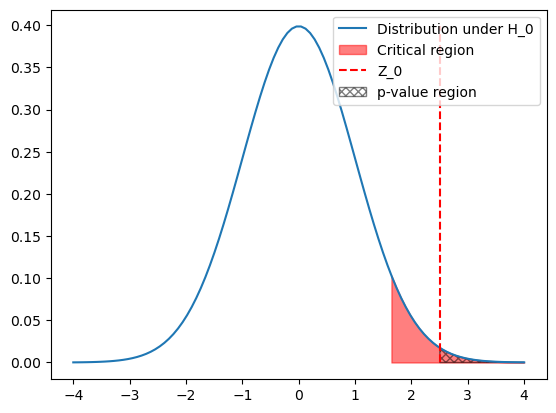

In [24]:
# Plot the normal distribution
x = np.linspace(-4, 4, 100)
y = stats.norm.pdf(x, 0, 1)
plt.plot(x, y, label='Distribution under H_0')

# Plot the critical region
x_fill = np.linspace(Z_alpha, 4, 100)
y_fill = stats.norm.pdf(x_fill, 0, 1)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label='Critical region')

# Plot the test statistic
plt.vlines(Z_0, 0, np.max(y), color='red', linestyles='dashed', label='Z_0')

# Plot the p-value region and will with a pattern
x_fill = np.linspace(Z_0, 4, 100)
y_fill = stats.norm.pdf(x_fill, 0, 1)
plt.fill_between(x_fill, y_fill, facecolor='none', alpha=0.5, hatch='xxxx', label='p-value region')
plt.legend()

plt.show()

#### Point c

Compute the 2-sided confidence interval on the mean.

The two-sided confidence interval is computed as:
$$\bar{x} - Z_{\alpha/2} \frac{\sigma}{\sqrt{n}} \leq \mu \leq \bar{x} + Z_{\alpha/2} \frac{\sigma}{\sqrt{n}}$$

where $\bar{x}$ is the sample mean, $Z_{\alpha/2}$ is the critical value, $\sigma$ is the standard deviation of the population, and $n$ is the sample size.

In [25]:
# Answer to point c
Z_alpha2 = stats.norm.ppf(1 - alpha / 2)

CI = [mu - Z_alpha2 * sigma / np.sqrt(n), mu + Z_alpha2 * sigma / np.sqrt(n)]
print("Confidence interval: [%.3f, %.3f]" % (CI[0], CI[1]))

Confidence interval: [1003.043, 1024.957]


If the mu_0 is inside the confidence interval, we accept the null hyp. In this case it absolutely isn't

#### Point d

Compute the one-sided (lower side) 95% confidence interval for the mean of the population.

The one-sided confidence interval is computed as:
$$\bar{x} - Z_{\alpha} \frac{\sigma}{\sqrt{n}} \leq \mu$$

where $\bar{x}$ is the sample mean, $Z_{\alpha}$ is the critical value, $\sigma$ is the standard deviation of the population, and $n$ is the sample size.

In [26]:
# Answer to point d
Z_alpha = stats.norm.ppf(1 - alpha)
CI_lower = mu - Z_alpha * sigma / np.sqrt(n)

print("Lower bound of the confidence interval: %.3f" % CI_lower)

Lower bound of the confidence interval: 1004.805


#### Point e

Compute the power curve. 

We know that the power curve is:
$$power = 1-\beta = 1-\Phi\left(Z_{\alpha/2} - \frac{\delta \sqrt{n}}{\sigma}\right) + \Phi\left(- Z_{\alpha/2} - \frac{\delta \sqrt{n}}{\sigma}\right)$$

where $Z_{\alpha/2}$ is the critical value, $\delta$ is the difference between the hypothesized mean and the true mean, $\sigma$ is the standard deviation of the population, and $n$ is the sample size.

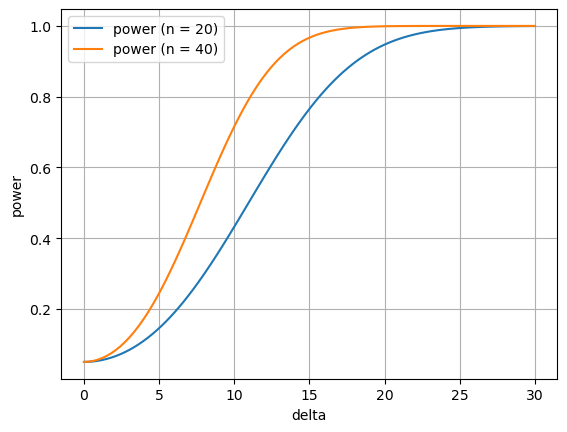

In [27]:
# Answer to point e
# Compute the power curve of the test
delta = np.linspace(0, 30, 100)
mu1 = mu0 + delta
Z_alpha2 = stats.norm.ppf(1 - alpha / 2)

# Compute the power curves for n = 20 and n = 40
n = 20
power_20 = 1 - stats.norm.cdf(Z_alpha2 - delta * np.sqrt(n) / sigma) + stats.norm.cdf(-Z_alpha2 - delta * np.sqrt(n) / sigma)
n = 40
power_40 = 1 - stats.norm.cdf(Z_alpha2 - delta * np.sqrt(n) / sigma) + stats.norm.cdf(-Z_alpha2 - delta * np.sqrt(n) / sigma)


# Plot the power curve
plt.plot(delta, power_20, label = "power (n = 20)")
plt.plot(delta, power_40, label = "power (n = 40)")
plt.xlabel("delta")
plt.ylabel("power")
plt.grid(True)
plt.legend()
plt.show()

## One-sample t-test

**Assumptions** 
- $X_1, X_2, ..., X_n$ is a random sample of size $n$ from a population.
- Population is **normal**.
- The **variance** of the population is <span style="color:red">**unknown**</span>

Under those assumptions, the quantity $T$ follows a Student-t distribution with $n-1$ degrees of freedom.
$$ T = \frac{\bar{X} - \mu}{{S}/{\sqrt{n}}} $$
Where:
- $S$ is the sample standard deviation

**Null hypothesis:** $H_0: \mu = \mu_0$

**Test statistic:** $ t_0 = \frac{\bar{X} - \mu_0}{{S}/{\sqrt{n}}} $

<center>

| Alternative hypotheses | Rejection criterion |
|----------|----------|
| $H_1: \mu \neq \mu_0$ | $\|t_0\| > t_{\alpha/2, n-1}$|
| $H_1: \mu > \mu_0$ | $t_0 > t_{\alpha, n-1}$|
| $H_1: \mu < \mu_0$ | $t_0 < -t_{\alpha, n-1}$|

</center>





A quick example

In [28]:
# A quick example...
mu = 10     # mean
sigma = 1   # standard deviation
n = 40    # sample size

# Generate the random sample
np.random.seed(230320)
x1 = np.random.normal(mu, sigma, n)

In [29]:
print('S (ddof = 0) = %.3f' % np.std(x1))
print('S (ddof = 1) = %.3f' % np.std(x1, ddof=1))

S (ddof = 0) = 0.916
S (ddof = 1) = 0.927


In [30]:
# Choose the mean of the null hypothesis
mu0 = 10

# Calculate the t-statistic
t_0 = (np.mean(x1) - mu0) / (np.std(x1, ddof=1) / np.sqrt(n))

print('Test statistic t_0 = %.3f' % t_0)

Test statistic t_0 = -0.223


Let's test $H_0$ against $H_1: \mu \gt \mu_0$.

In [31]:

# Compare the t-statistic with the critical value
alpha = 0.05   # significance level
t_alpha = stats.t.ppf(1-alpha, n-1)

if t_0 > t_alpha:
    print('Reject the null hypothesis at alpha = %.2f' % alpha)
else:
    print('Accept the null hypothesis at alpha = %.2f' % alpha)

Accept the null hypothesis at alpha = 0.05


We can also compute the corresponding confidence interval as:
$$\mu \geq \bar{X} -  t_{\alpha, n-1} \cdot \frac{S}{\sqrt{n}}$$


In [32]:
# Compute the confidence interval
CI = np.mean(x1) - t_alpha * np.std(x1, ddof=1)/np.sqrt(n)
print('Confidence interval (lower bound): %.3f' % (CI))

Confidence interval (lower bound): 9.720


The p-value can be computed from the $t_0$ test statistic by applying the `cdf()` function.

In [33]:
pval = 1 - stats.t.cdf(t_0,n-1)
print('p-value = %.3f' % pval)

p-value = 0.588


Or you can use the built-in function `stats.ttest_1samp()`.

In [34]:
# Use the built-in function to make the t-test
t_0, pval = stats.ttest_1samp(x1, mu0, alternative='greater')
print('Test statistic t_0 = %.3f' % t_0)
print('p-value = %.3f' % pval)

Test statistic t_0 = -0.223
p-value = 0.588


## Chi-squared test for the variance (one sample)

**Assumptions:**
- $X_1, X_2, ..., X_n$ is a random sample of size $n$ from a population;
- Population is normal (or central limit theorem applies);
- The mean of the population is unknown.

Under those assumptions, the quantity:

$$ \chi^2 = \frac{(n - 1)S^2}{\sigma^2} $$

follows a chi-squared $\chi^2$ distribution with $n - 1$ degrees of freedom.

## EXERCISE 2: Check for Normality (Shapiro Test), t-test, $\chi^2$-test

A study in the Journal of Food Engineering 282 (2020) investigates the use of the insect “Acheta domesticus (AD)” as source of protein as efficient alternative to conventional animal proteins. An extrusion process for the production of AD powder is investigated and various descriptors are analyzed. One of them is the water content (g water/100 g sample). 10 values of this descriptor are reported in ESE2_ex2.csv. 

a) Compute the lower limit of a one-sided confidence interval for the water content (99%)

b) Compute the two-sided confidence interval on the water content (98%)

c) Compute the upper limit of the one-sided interval for the variance (99%)

d) Compute a two-sided confidence interval for the standard deviation (98%)

e) Assuming that the maximum observed value (10.751) is wrong (true value is 10.33), recompute the two-sided confidence intervals (mean and variance) and comment

f) Assuming that the fourth observation 10.32 is wrong (true value is 10.33) recompute the two-sided confidence intervals (mean and variance) and comment

In [35]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Import the dataset
data = pd.read_csv('ESE2_ex2.csv')

# Inspect the dataset
data.head()

,Water content
0,10.100756
1,10.377559
2,10.415222
3,10.320178
4,10.216656


### Point a

Compute the lower limit of a one-sided CI for the water content (99%).

> ### Solution

In [36]:
# Input data
CL = 0.99       # Confidence level
alpha = 1 - CL  # Significance level
n = len(data)   # Sample size

> First of all, check the normality assumption. 

p-value of the Shapiro-Wilk test: 0.154


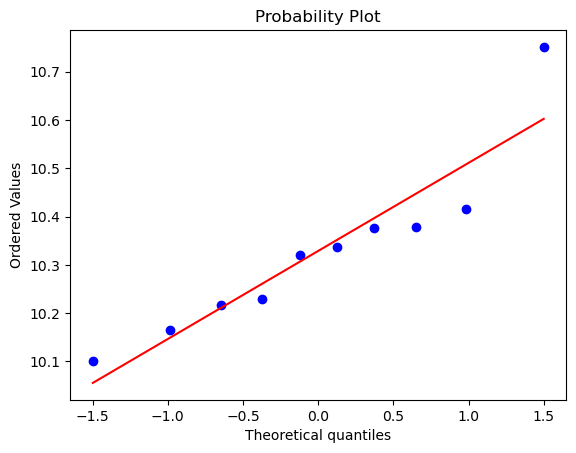

In [37]:

# Verify the normality of the data
# Shapiro-Wilk test
_, p_value_SW = stats.shapiro(data['Water content'])
print('p-value of the Shapiro-Wilk test: %.3f' % p_value_SW)

# QQ-plot
stats.probplot(data['Water content'], dist='norm', plot=plt)
plt.show()

In [38]:
# Anderson-Darling test
def ADpvalue(data):
    """
    This function computes the p-value of the Anderson-Darling test.
    
    Input:
        data: data to be tested
    Output:
        p_value_AD: p-value of the Anderson-Darling test

    """
    anderson = stats.anderson(data, dist='norm')
    # compute the p-value of the Anderson-Darling test
    if anderson.statistic >= 0.6:
        p_value_AD = np.exp(1.2937 - 5.709*anderson.statistic + 0.0186*(anderson.statistic**2))
    elif anderson.statistic >= 0.34:
        p_value_AD = np.exp(0.9177 - 4.279*anderson.statistic - 1.38*(anderson.statistic**2))
    elif anderson.statistic >= 0.2:
        p_value_AD = 1 - np.exp(-8.318 + 42.796*anderson.statistic - 59.938*(anderson.statistic**2))
    else:
        p_value_AD = 1 - np.exp(-13.436 + 101.14*anderson.statistic - 223.73*(anderson.statistic**2))

    return p_value_AD
    
p_value_AD = ADpvalue(data['Water content'])
print('p-value of the Anderson-Darling test: %.3f' % p_value_AD)

p-value of the Anderson-Darling test: 0.235


> We cannot reject the normality assumption, so we can use the t-test.
> 
> Remember the t-test statistic:
> 
> $$t_{n-1} = \frac{\bar{X} - \mu}{S/\sqrt{n}}$$
> 
> where $\bar{x}$ is the sample mean, $\mu$ is the population mean, $S$ is the sample standard deviation and $n$ is the sample size.
> 
> The two-sided CI for the mean is computed from:
> 
> $$Pr(-t_{\alpha/2,n-1} \leq \frac{\bar{X} - \mu}{S/\sqrt{n}} \leq t_{\alpha/2,n-1}) = 1 - \alpha$$
> 
> where $\alpha$ is the significance level. So the two-sided CI is:
> 
> $$\bar{X} - t_{\alpha/2,n-1} \frac{S}{\sqrt{n}} \leq \mu \leq \bar{X} + t_{\alpha/2,n-1} \frac{S}{\sqrt{n}}$$
> 
> The one-sided CI is:
> 
> $$\bar{X} - t_{\alpha,n-1} \frac{S}{\sqrt{n}} \leq \mu$$

In [39]:
# Compute the lower bound of the one-sided confidence interval
df = n - 1     # Degrees of freedom
t_alpha = stats.t.ppf(1 - alpha, df)
CI_lower = data['Water content'].mean() - t_alpha * data['Water content'].std() / np.sqrt(n)
print('Lower bound of the one-sided confidence interval: %.3f' % CI_lower)

Lower bound of the one-sided confidence interval: 10.168


> *Bonus: visualize the CI.*

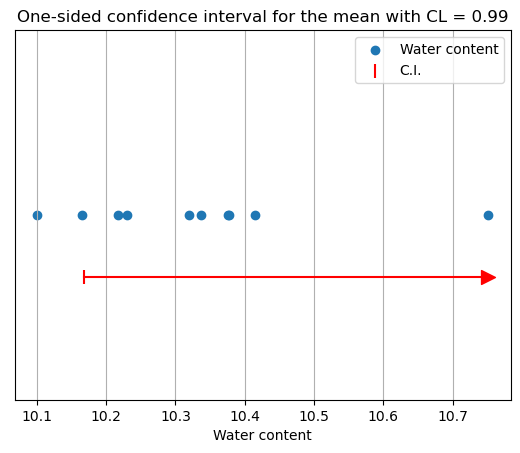

In [40]:
# Visualize the confidence interval on a dot plot
plt.title('One-sided confidence interval for the mean with CL = %.2f' % CL)
plt.scatter(data['Water content'], np.zeros(n), label='Water content')
# plot the confidence interval
plt.scatter(CI_lower, -0.01, label='C.I.', color='r', marker='|', s=100)
plt.plot([CI_lower, np.max(data['Water content'])], [-0.01, -0.01], color='r')
plt.scatter(np.max(data['Water content']), -0.01, color='r', marker='>', s=100)
# Add labels and legend
plt.ylim(-0.03, 0.03)
plt.xlabel('Water content')
plt.yticks([])
plt.legend()
plt.grid()
plt.show()

### Point b

Two sided CI on the mean (98%).

> ### Solution
> The two-sided CI on the mean is computed from:
>
> $$\bar{X} - t_{\alpha/2,n-1} \frac{S}{\sqrt{n}} \leq \mu \leq \bar{X} + t_{\alpha/2,n-1} \frac{S}{\sqrt{n}}$$

In [41]:
# Answer to point b
CL = 0.98       # Confidence level
alpha = 1 - CL  # Significance level

# Compute the two-sided confidence interval
t_alpha2 = stats.t.ppf(1 - alpha / 2, df)
CI_b = [data['Water content'].mean() - t_alpha2 * data['Water content'].std() / np.sqrt(n),
        data['Water content'].mean() + t_alpha2 * data['Water content'].std() / np.sqrt(n)]
print('Two-sided confidence interval (%.2f): [%.3f, %.3f]' % (CL, CI_b[0], CI_b[1]))

Two-sided confidence interval (0.98): [10.168, 10.490]


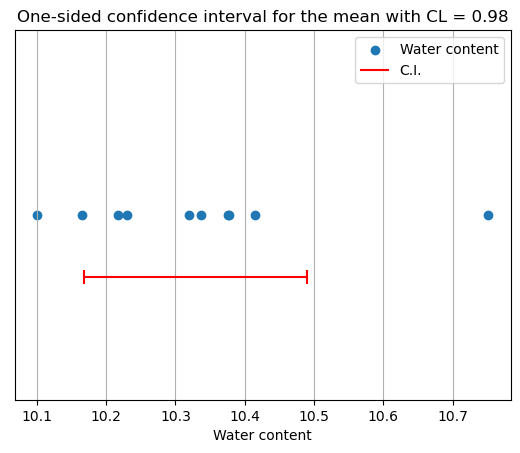

In [42]:
# Visualize the confidence interval on a dot plot
plt.title('One-sided confidence interval for the mean with CL = %.2f' % CL)
plt.scatter(data['Water content'], np.zeros(n), label='Water content')
# plot the confidence interval
plt.scatter(CI_b[0], -0.01, color='r', marker='|', s=100)
plt.scatter(CI_b[1], -0.01, color='r', marker='|', s=100)
plt.plot([CI_b[0], CI_b[1]], [-0.01, -0.01], color='r', label='C.I.')
# Add labels and legend
plt.ylim(-0.03, 0.03)
plt.xlabel('Water content')
plt.yticks([])
plt.legend()
plt.grid()
plt.show()

### Point c

One-sided (upper) CI on the variance (99%).

> ### Solution
> For this, we need to apply the Chi-squared test. The Chi-squared test statistic is:
> 
> $$\chi^2 = \frac{(n-1)S^2}{\sigma^2}$$
> 
> where $S^2$ is the sample variance and $\sigma^2$ is the population variance. 
> 
> The one-sided CI on the variance is computed from:
> 
> $$ \sigma^2 \leq \frac{(n-1)S^2}{\chi^2_{1-\alpha,n-1}}$$

In [43]:
# Answer to point c
CL = 0.99       # Confidence level
alpha = 1 - CL  # Significance level

# Compute the one-sided CI on the variance
df = n - 1      # Degrees of freedom
chi2 = stats.chi2.ppf(alpha, df)
CI_upper = df * data['Water content'].var() / chi2
print('Upper bound of the one-sided CI on the variance: %.3f' % CI_upper)

Upper bound of the one-sided CI on the variance: 0.140


### Point d

Two-sided CI on the standard deviation (98%).

> ### Solution
> For the two-sided CI on the standard deviation, we compute the CI on the variance and then we take the square root of the CI on the variance.
>
> $$ \frac{(n-1)S^2}{\chi^2_{\alpha/2,n-1}} \leq \sigma^2 \leq \frac{(n-1)S^2}{\chi^2_{1-\alpha/2,n-1}}$$

In [44]:
# Answer to point d
CL = 0.98       # Confidence level
alpha = 1 - CL  # Significance level

# Compute the two-sided CI on the variance
chi2_1 = stats.chi2.ppf(alpha / 2, df)
chi2_2 = stats.chi2.ppf(1 - alpha / 2, df)

CI_var = [df * data['Water content'].var() / chi2_2,
        df * data['Water content'].var() / chi2_1]

CI_stdev_d = np.sqrt(CI_var)
print('Two-sided CI on the standard deviation (CL = %.2f): [%.3f, %.3f]' % (CL, CI_stdev_d[0], CI_stdev_d[1]))

Two-sided CI on the standard deviation (CL = 0.98): [0.116, 0.374]


### Point e

Two-sided CI on the mean and stdev (98%) on corrected data. 

In [45]:
# Answer to point e

# Correct the data first
# Make a copy of data to avoid changing the original data
data_corrected = data.copy()
# Replace the maximum value in data_corrected with the value 10.33
data_corrected.loc[data_corrected['Water content'] == data_corrected['Water content'].max(), 'Water content'] = 10.33
# Alternatively, you can also modify the data in the csv and read it again

In [46]:
# Now you can re-run the code of point b using data_corrected
CL = 0.98       # Confidence level
alpha = 1 - CL  # Significance level

# Compute the two-sided confidence interval
t_alpha = stats.t.ppf(1 - alpha / 2, df)
CI = [data_corrected['Water content'].mean() - t_alpha * data_corrected['Water content'].std() / np.sqrt(n),
        data_corrected['Water content'].mean() + t_alpha * data_corrected['Water content'].std() / np.sqrt(n)]
print('Previous two-sided confidence (point b): [%.3f, %.3f]' % (CI_b[0], CI_b[1]))
print('Two-sided confidence interval on corrected data: [%.3f, %.3f]' % (CI[0], CI[1]))


Previous two-sided confidence (point b): [10.168, 10.490]
Two-sided confidence interval on corrected data: [10.195, 10.379]


In [47]:
# Re-run the code of point d using data_corrected for the two-sided CI on the stdev
CL = 0.98       # Confidence level
alpha = 1 - CL  # Significance level

# Compute the two-sided CI on the variance
chi2_1 = stats.chi2.ppf(alpha / 2, df)
chi2_2 = stats.chi2.ppf(1 - alpha / 2, df)

CI_var = [df * data_corrected['Water content'].var() / chi2_2,
        df * data_corrected['Water content'].var() / chi2_1]

CI_stdev = np.sqrt(CI_var)
print('Previous two-sided CI on the standard deviation (point d): [%.3f, %.3f]' % (CI_stdev_d[0], CI_stdev_d[1]))
print('Two-sided CI on the standard deviation (CL = %.2f): [%.3f, %.3f]' % (CL, CI_stdev[0], CI_stdev[1]))

Previous two-sided CI on the standard deviation (point d): [0.116, 0.374]
Two-sided CI on the standard deviation (CL = 0.98): [0.067, 0.214]


> <span style="color:orange">
> Evident change of confidence intervals both on the mean and the variance.
>
> Extreme values (outliers) have a strong influence, especially when the sample has a small size. 
> </span>

### Point f

Two-sided mean and confidence interval on mean and stdev (98%) on corrected data. 

In [48]:
# Answer to point f
# Correct the data first
# Make a copy of data to avoid changing the original data
data_corrected_2 = data.copy()
# Replace the fourth observation in data_corrected_2 with the true value 10.33
data_corrected_2.loc[3, 'Water content'] = 10.33

In [49]:
# Now you can re-run the code of point b using data_corrected_2 for the two-sided CI
CL = 0.98       # Confidence level
alpha = 1 - CL  # Significance level

# Compute the two-sided confidence interval
t_alpha = stats.t.ppf(1 - alpha / 2, df)
CI = [data_corrected_2['Water content'].mean() - t_alpha * data_corrected_2['Water content'].std() / np.sqrt(n),
        data_corrected_2['Water content'].mean() + t_alpha * data_corrected_2['Water content'].std() / np.sqrt(n)]
print('Previous two-sided confidence (point b): [%.3f, %.3f]' % (CI_b[0], CI_b[1]))
print('Two-sided confidence interval on corrected data: [%.3f, %.3f]' % (CI[0], CI[1]))

Previous two-sided confidence (point b): [10.168, 10.490]
Two-sided confidence interval on corrected data: [10.169, 10.491]


In [50]:
# Re-run the code of point d using data_corrected_2 for the two-sided CI on the stdev
CL = 0.98       # Confidence level
alpha = 1 - CL  # Significance level

# Compute the two-sided CI on the variance
chi2_1 = stats.chi2.ppf(alpha / 2, df)
chi2_2 = stats.chi2.ppf(1 - alpha / 2, df)

CI_var = [df * data_corrected_2['Water content'].var() / chi2_2,
        df * data_corrected_2['Water content'].var() / chi2_1]

CI_stdev = np.sqrt(CI_var)
print('Previous two-sided CI on the standard deviation (point d): [%.3f, %.3f]' % (CI_stdev_d[0], CI_stdev_d[1]))
print('Two-sided CI on the standard deviation (CL = %.2f): [%.3f, %.3f]' % (CL, CI_stdev[0], CI_stdev[1]))

Previous two-sided CI on the standard deviation (point d): [0.116, 0.374]
Two-sided CI on the standard deviation (CL = 0.98): [0.116, 0.374]


> <span style="color:orange">
> This time we changed a value that was closer to the expected value: the modification of the confidence intervals is much smaller than before.
> </span>

# PART 3 - Hypothesis testing in the presence of two samples

## EXERCISE 3 : Test on the difference of two samples

Ten people are involved in a diet program. The weights before and after the program is reported in the table (expressed in pounds, 1 lb =0.454). The data is stored in the file `ESE2_ex3.csv`.

a) Is there statistical evidence (95%) to state that the diet program was effective?

b) Can we state that (95%) the program yielded a mean weigth reduction higher than 10 lb?

c) Design a two-sided confidence interval at 95% on the weight difference

In [51]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Import the dataset
data = pd.read_csv('ESE2_ex3.csv')

# Inspect the dataset
data.head()

,before,after,d
0,195,187,8
1,213,195,18
2,247,221,26
3,201,190,11
4,187,175,12


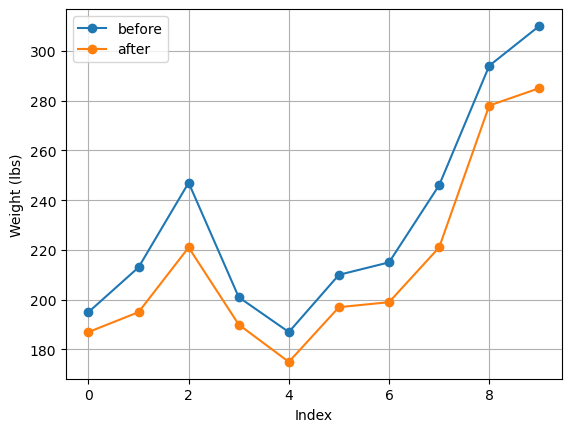

In [52]:
# Let's plot the data first
plt.plot(data['before'], 'o-', label='before')
plt.plot(data['after'], 'o-', label='after')
plt.xlabel('Index')
plt.ylabel('Weight (lbs)')
plt.legend()
plt.grid()
plt.show()

### Point a

Is there statistical evidence (95%) to state that the diet program was effective?

> ### Solution
>
> Data are PAIRED, so we are interested in the difference between the two. 


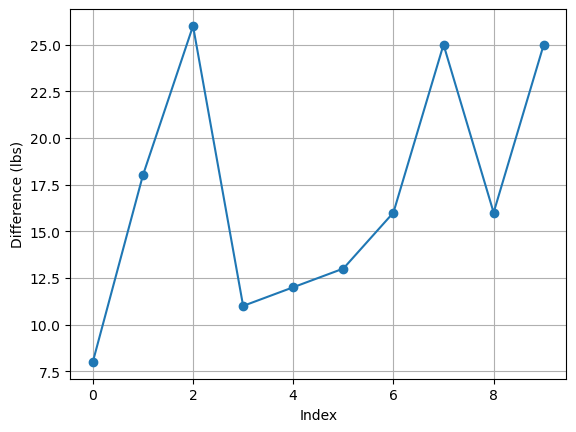

In [53]:
# Plot the difference d
plt.plot(data['d'], 'o-')
plt.xlabel('Index')
plt.ylabel('Difference (lbs)')
plt.grid()
plt.show()

> Let's check the normality of the data with the Shapiro-Wilk test. 

p-value of the Shapiro-Wilk test: 0.270


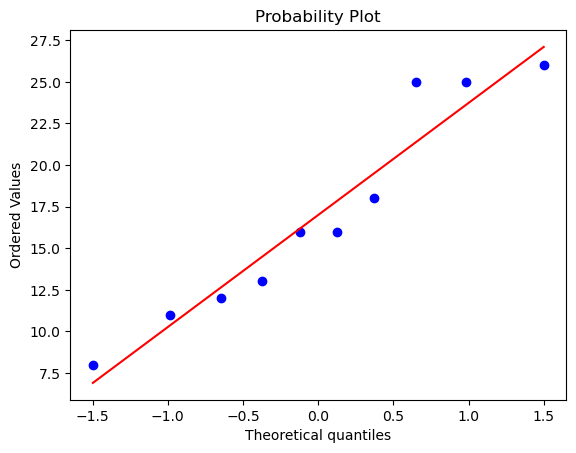

In [54]:
# Check the normality of the difference
# We can use the Shapiro-Wilk test
_, p_value_SW = stats.shapiro(data['d'])
print('p-value of the Shapiro-Wilk test: %.3f' % p_value_SW)

# QQ-plot
stats.probplot(data['d'], dist="norm", plot=plt)
plt.show()

> Now that we know that the data are normally distributed, we can use the t-test to evaluate the following hypothesis:
> $$ H_0: \mu_d = 0 $$
> $$ H_1: \mu_d > 0 $$
> The t-test statistic is:
> $$ t_0 = \frac{\bar{d}}{s_d/\sqrt{n}} $$
> where $\bar{d}$ is the sample mean of the differences, $s_d$ is the sample standard deviation of the differences and $n$ is the number of observations.

In [55]:
# Compute the t-statistic and the corresponding p-value
n = len(data['d'])  # number of samples
df = n - 1          # degrees of freedom

t0 = np.mean(data['d']) / (data['d'].std() / np.sqrt(n))
print('t-statistic: %.3f' % t0)

# Compute the p-value
p_value_t0 = 1 - stats.t.cdf(np.abs(t0), df)
print('p-value: %.3f' % p_value_t0)


t-statistic: 8.384
p-value: 0.000


> Alternatively, we can use the `ttest_1samp` function from the `scipy.stats` module.

In [56]:
# Perform the t-test on the difference using the stats.ttest_1samp function
t0_stats, p_value_t0_stats = stats.ttest_1samp(data['d'], popmean = 0, alternative='greater')
print('t-statistic from stats.ttest_1samp: %.3f' % t0_stats)
print('p-value from stats.ttest_1samp: %.3f' % p_value_t0_stats)

t-statistic from stats.ttest_1samp: 8.384
p-value from stats.ttest_1samp: 0.000


> Alternatively, we can directly use the `ttest_rel` function from the `scipy.stats` module on the original data (without computing the differences).

In [57]:
# Alternatively, you can perform a paired t-test using the stats.ttest_rel function
t0_stats_trel, p_value_t0_stats_trel = stats.ttest_rel(data['before'], data['after'], alternative='greater')
print('t-statistic from stats.ttest_rel: %.3f' % t0_stats_trel)
print('p-value from stats.ttest_rel: %.3f' % p_value_t0_stats_trel)

t-statistic from stats.ttest_rel: 8.384
p-value from stats.ttest_rel: 0.000


### Point b

Can we state that (95%) the program yielded a mean weigth reduction higher than 10 lbs?

> ### Solution
>
> We can use the same t-test as in point a, but with the following hypothesis:
> $$ H_0: \mu_d = \Delta_0 $$
> $$ H_1: \mu_d > \Delta_0 $$
> The t-test statistic is still:
> $$ t_0 = \frac{\bar{d} - \Delta_0}{s_d/\sqrt{n}} $$
> where $\bar{d}$ is the sample mean of the differences, $s_d$ is the sample standard deviation of the differences, $n$ is the number of observations and $\Delta_0$ is the hypothesized value of the mean difference.

In [58]:
# Answer to point b
CL = 0.95       # confidence level
alpha = 1 - CL  # significance level

delta0 = 10     # null hypothesis
t0_delta0_stats, p_value_t0_delta0_stats = stats.ttest_1samp(data['d'], popmean = delta0, alternative = 'greater')
print('t-statistic from stats.ttest_1samp: %.3f' % t0_delta0_stats)
print('p-value from stats.ttest_1samp: %.4f' % p_value_t0_delta0_stats)

t-statistic from stats.ttest_1samp: 3.452
p-value from stats.ttest_1samp: 0.0036


> Let's plot the confidence interval for the mean difference.

Lower bound of the one-sided confidence interval: 13.283


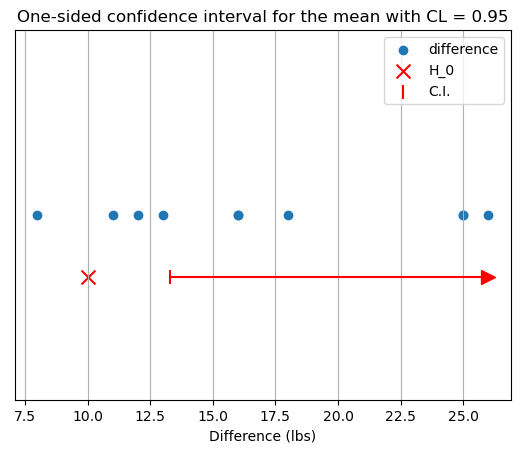

In [59]:
# Calculate the lower bound of the one-sided confidence interval
t_alpha = stats.t.ppf(1 - alpha, df)
CI_lower = data['d'].mean() - t_alpha * data['d'].std() / np.sqrt(n)
print('Lower bound of the one-sided confidence interval: %.3f' % CI_lower)

# Visualize the confidence interval on a dot plot
plt.title('One-sided confidence interval for the mean with CL = %.2f' % CL)
plt.scatter(data['d'], np.zeros(n), label='difference')
# plot H0
plt.scatter(delta0, -0.01, label='H_0', color='r', marker='x', s=100)
# plot the confidence interval
plt.scatter(CI_lower, -0.01, label='C.I.', color='r', marker='|', s=100)
plt.plot([CI_lower, np.max(data['d'])], [-0.01, -0.01], color='r')
plt.scatter(np.max(data['d']), -0.01, color='r', marker='>', s=100)
# Add labels and legend
plt.ylim(-0.03, 0.03)
plt.xlabel('Difference (lbs)')
plt.yticks([])
plt.legend()
plt.grid()
plt.show()


### Point c

Design a two-sided confidence interval at 95% on the weight difference.

> ### Solution
>
> We can use the same t-test as in point a, but with the following hypothesis:
> $$ H_0: \mu_d = 0 $$
> $$ H_1: \mu_d \neq 0 $$
> The t-test statistic is still:
> $$ t_0 = \frac{\bar{d}}{s_d/\sqrt{n}} $$
> And the corresponding confidence interval is:
> $$ \bar{d} - t_{\alpha/2, n-1} \frac{s_d}{\sqrt{n}} \leq \mu_d \leq \bar{d} + t_{\alpha/2, n-1} \frac{s_d}{\sqrt{n}} $$

In [60]:
# Answer to point c
CL = 0.95       # confidence level
alpha = 1 - CL  # significance level

t_alpha2 = stats.t.ppf(1 - alpha / 2, df)
CI = [data['d'].mean() - t_alpha2 * data['d'].std() / np.sqrt(n), 
        data['d'].mean() + t_alpha2 * data['d'].std() / np.sqrt(n)]
print('Confidence interval: (%.3f, %.3f)' % (CI[0], CI[1]))

Confidence interval: (12.413, 21.587)


In [61]:
# Alternatively, you can use the stats.t.interval function
CI = stats.t.interval(CL, df, loc=data['d'].mean(), scale=data['d'].std() / np.sqrt(n))
print('Confidence interval: (%.3f, %.3f)' % (CI[0], CI[1]))

Confidence interval: (12.413, 21.587)


> Let's plot the confidence interval for the mean difference.

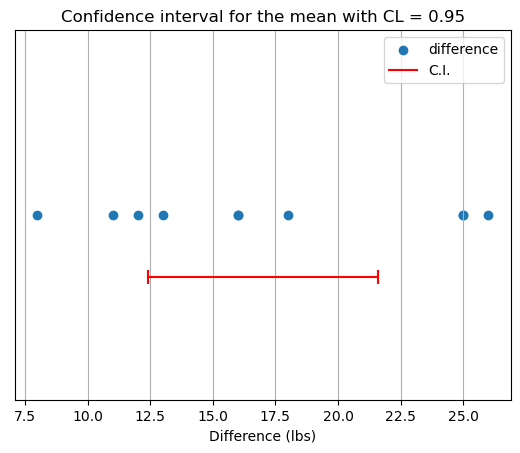

In [62]:
# Visualize the confidence interval on a dot plot
plt.title('Confidence interval for the mean with CL = %.2f' % CL)
plt.scatter(data['d'], np.zeros(n), label='difference')
# plot the confidence interval alonside the dot plot
plt.scatter(CI[0], -0.01, color='r', marker='|', s=100)
plt.plot([CI[0], CI[1]], [-0.01, -0.01], color='r', label='C.I.')
plt.scatter(CI[1], -0.01, color='r', marker='|', s=100)
# Add labels and legend
plt.ylim(-0.03, 0.03)
plt.xlabel('Difference (lbs)')
plt.yticks([])
plt.legend()
plt.grid()
plt.show()

## EXERCISE 4: F-test on unknow variances

We want to evaluate the resistance of resistors provided by two different suppliers. The data is stored in the file `ESE2_ex4.csv`.

a) Design a boxplot to compare the two samples and estimate the major descriptive statistics

b) What can we infer about the mean resistance of the resistors provided by the two different suppliers?

c) Compute the Type II error expression in the variance equality test and compute the test power when the true variance of the first supplier is 1.5 times larger than the one of the second supplier

In [63]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Import the dataset
data = pd.read_csv('ESE2_ex4.csv')

# Inspect the dataset
data.head()

,supp1,supp2
0,96.8,106.8
1,100.0,103.7
2,99.9,104.0
3,98.6,102.8
4,101.2,107.2


> Let's inspect the data.

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   supp1   25 non-null     float64
 1   supp2   35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


> The dataset contains NaN values because the number of observations is different for each supplier. We need to remove them.

In [65]:
# Let's split the dataset into two dataframes, one for each supplier
data1 = data['supp1']
data2 = data['supp2']

# and remove the nan values from data1
data1 = data1.dropna()

### Point a

Design a boxplot to compare the two samples and estimate the major descriptive statistics.

> ### Solution
> Use the `boxplot` function from `matplotlib.pyplot` to plot the boxplot. 

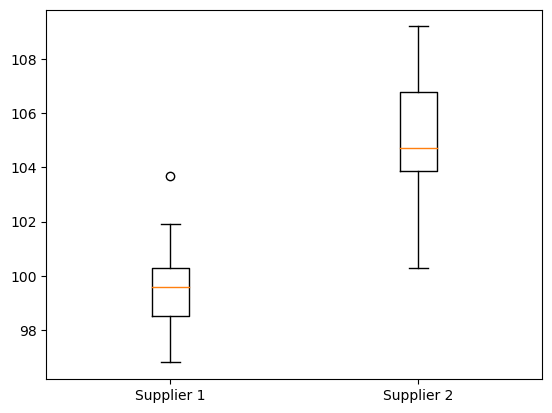

In [66]:
# Answer to point a
plt.boxplot([data1, data2], labels=['Supplier 1', 'Supplier 2'])
plt.show()

> Use the `describe` function from `pandas` to compute the descriptive statistics.

In [67]:
data.describe()

,supp1,supp2
count,25.000000,35.000000
mean,99.576000,105.068571
std,1.528965,1.962557
min,96.800000,100.300000
25%,98.500000,103.850000
50%,99.600000,104.700000
75%,100.300000,106.800000
max,103.700000,109.200000


### Point b

What can we infer about the mean resistance of the resistors provided by the two different suppliers?

> ### Solution
> First we need to check the assumptions: 
> + Normality
> + Independence (we assume it is ok, for now) - within and between
> + Other? Outliers?

> Let's check the normality with the Shapiro-Wilk test.

p-value for Shapiro-Wilk test for supplier 1: 0.523
p-value for Shapiro-Wilk test for supplier 2: 0.722


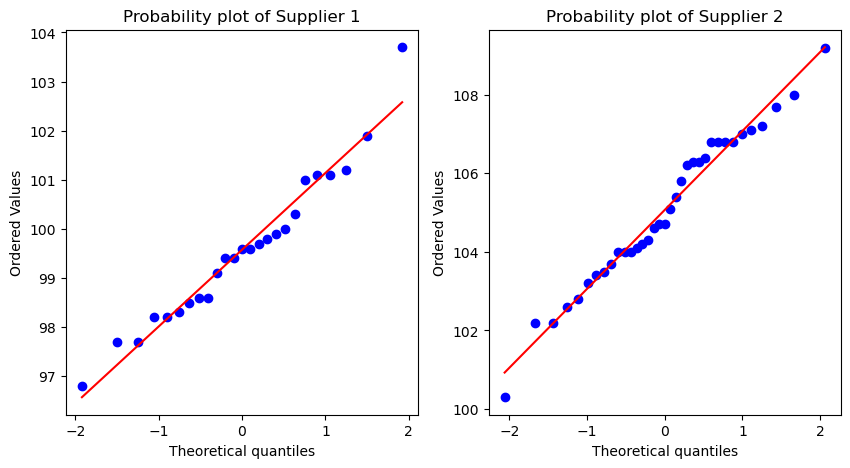

In [68]:
# Answer to point b
n1 = len(data1) # number of observations for supplier 1
n2 = len(data2) # number of observations for supplier 2

# Let's check the assumptions
# Normality
# Shapiro-Wilk test
_, p_value_SW_1 = stats.shapiro(data1)
_, p_value_SW_2 = stats.shapiro(data2)
print('p-value for Shapiro-Wilk test for supplier 1: %.3f' % p_value_SW_1)
print('p-value for Shapiro-Wilk test for supplier 2: %.3f' % p_value_SW_2)

# QQ-plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
stats.probplot(data1, plot=ax[0])
ax[0].set_title('Probability plot of Supplier 1')
stats.probplot(data2, plot=ax[1])
ax[1].set_title('Probability plot of Supplier 2')
plt.show()

> We want to compare the means of two populations.
> Variances are unknown, thus there are two possible situations:
> - Equal (unknown) variances
> - Different (unknown) variances
> 
>
> **First step: hypothesis test on the equality of variances** 
>
> Null hypothesis: the two variances are equal
> $$H_0: \sigma_1^2 = \sigma_2^2$$
> Alternative hypothesis: the two variances are different
> $$H_1: \sigma_1^2 \neq \sigma_2^2$$
>
> This hypothesis test is equivalent to:
> 
> $$H_0: \frac{\sigma_1^2}{\sigma_2^2} = 1$$
>
> $$H_1: \frac{\sigma_1^2}{\sigma_2^2} \neq 1$$
>
> We can use the F-test to test the equality of variances. The test statistic is:
> $$F_0 = \frac{s_1^2}{s_2^2}$$
> 
> The corresponding confidence interval is:
> $$\frac{s_1^2}{s_2^2} F_{\alpha/2, n_2-1, n_1-1} \leq \frac{\sigma_1^2}{\sigma_2^2} \leq \frac{s_1^2}{s_2^2} F_{1-\alpha/2, n_2-1, n_1-1}$$

In [69]:
CL = 0.95       # Confidence level
alpha = 1 - CL  # Significance level

# Test the equality of variances
# F-test
F0 = data1.var()/data2.var()
df1 = n1 - 1 # degrees of freedom for supplier 1
df2 = n2 - 1 # degrees of freedom for supplier 2
CI = [F0 * stats.f.ppf(alpha/2, df2, df1), F0 * stats.f.ppf(1-alpha/2, df2, df1)]
print('Confidence interval on the ratio of variances (CL = %.2f): [%.3f, %.3f]' % (CL, CI[0], CI[1]))

Confidence interval on the ratio of variances (CL = 0.95): [0.293, 1.323]


> There is no statistical evidence to state that the two variances are different (accept null hypothesis), because the interval includes 1. 


> Let's plot the distribution under the null hypothesis, the rejection region and the test statistic.

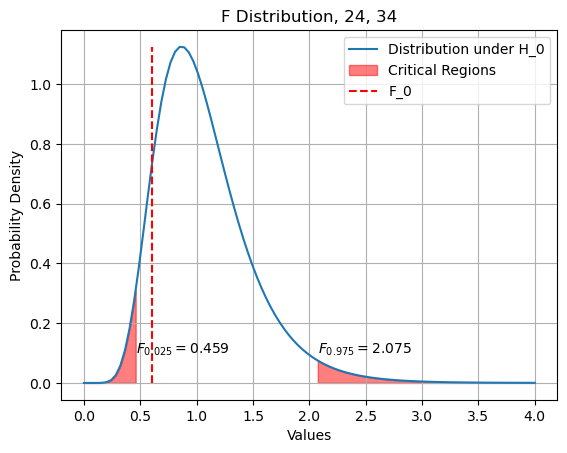

In [70]:
# plot the cumulative probability
x = np.linspace(0, 4, 100)
plt.plot(x, stats.f.pdf(x, df1, df2), label='Distribution under H_0')

# Adding Title, Labels and Grid
plt.title("F Distribution, %d, %d" % (df1, df2))
plt.xlabel("Values")
plt.ylabel("Probability Density")
plt.grid(True)      

# Filling the Probability Area
F_1 = stats.f.ppf(alpha/2, df1, df2)
F_2 = stats.f.ppf(1-alpha/2, df1, df2)
x_fill = np.linspace(0, F_1, 100)
y_fill = stats.f.pdf(x_fill, df1, df2)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5)
x_fill = np.linspace(F_2, np.max(x), 100)
y_fill = stats.f.pdf(x_fill, df1, df2)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label='Critical Regions')
# Add text to the plot with the chi2 values and centering the text
plt.text(F_1, 0.1, r'$F_{%.3f} = {%.3f}$' % (alpha/2, F_1), fontsize=10)
plt.text(F_2, 0.1, r'$F_{%.3f} = {%.3f}$' % (1-alpha/2, F_2), fontsize=10)

# Plot the test statistic F0
plt.vlines(F0, 0, np.max(stats.f.pdf(x, df1, df2)), color='r', linestyle='--', label='F_0')

# Showing Plot
plt.legend()
plt.show()

> Let's compute the p-value corresponding to the test statistic.

In [71]:
# Compute the p-value
p_value_F0 = 2 * stats.f.cdf(F0, df1, df2)

print('p-value for F-test for equal variances: %.3f' % p_value_F0)

p-value for F-test for equal variances: 0.205


> We can also use the Chi-squared statistic to compute the confidence interval for the two standard deviations.
>
> Rember:
> $$\frac{(n-1)s^2}{\chi^2_{\alpha/2, n-1}} \leq \sigma^2 \leq \frac{(n-1)s^2}{\chi^2_{1-\alpha/2, n-1}}$$

In [72]:
# Compute the 95% confidence interval on the individual standard deviation
CI_sigma_1 = np.sqrt([(df1 * data1.var())/stats.chi2.ppf(1-alpha/2, df1), (df1 * data1.var())/stats.chi2.ppf(alpha/2, df1)])
CI_sigma_2 = np.sqrt([(df2 * data2.var())/stats.chi2.ppf(1-alpha/2, df2), (df2 * data2.var())/stats.chi2.ppf(alpha/2, df2)])
print('Confidence interval on the standard deviation for supplier 1 (CL = %.2f): [%.3f, %.3f]' % (CL, CI_sigma_1[0], CI_sigma_1[1]))
print('Confidence interval on the standard deviation for supplier 2 (CL = %.2f): [%.3f, %.3f]' % (CL, CI_sigma_2[0], CI_sigma_2[1]))


Confidence interval on the standard deviation for supplier 1 (CL = 0.95): [1.194, 2.127]
Confidence interval on the standard deviation for supplier 2 (CL = 0.95): [1.587, 2.571]


> Now that we have verified the equality of variances, we can perform the t-test (with equal variances). So we can use the `ttest_ind` function from `scipy.stats` and set the `equal_var` parameter to `True`.
>
> Remember the formula of the two-sample t-test: 
> $$T = \frac{(\bar{X}_1 - \bar{X}_2)-(\mu_1 - \mu_2)}{S_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$
>
> where:
> $$S_p^2 = \frac{(n_1-1)S_1^2 + (n_2-1)S_2^2}{n_1+n_2-2}$$

In [73]:
t0, p_value_t0 = stats.ttest_ind(data1, data2, equal_var=True)
print('t-test: t0 = %.3f' % t0)
print('p-value for t-test: %.3f' % p_value_t0)
print('as p-value is < 0.05, we reject the null hypothesis (which stated that the suppliers had the same mean), therefore the two mean resistances are statistically different')

t-test: t0 = -11.680
p-value for t-test: 0.000
as p-value is < 0.05, we reject the null hypothesis (which stated that the suppliers had the same mean), therefore the two mean resistances are statistically different


### Point c

Compute the Type II error expression in the variance equality test and compute the test power when the true variance of the first supplier is 1.5 times larger than the one of the second supplier.

> ### Solution
> The Type II error is the probability of accepting the null hypothesis when it is false.
> $$\beta = Pr(\text{accept } H_0 \text{ when } H_1 \text{ is true})$$
>
> Let's expand the formula for the F-test:
> $$\beta = Pr \left(F_{1-\alpha/2,n_1-1,n_2-1} \leq \frac{s_1^2}{s_2^2} \leq F_{\alpha/2,n_1-1,n_2-1} \mid \frac{\sigma_1^2}{\sigma_2^2} = \delta \neq 1 \right)$$
>
> If we multiply all the terms by $\sigma_2^2 / \sigma_1^2$ we get:
> $$ \frac{S_1^2 / \sigma_1^2}{S_2^2 / \sigma_2^2} \sim F_{n_1-1,n_2-1}$$
>
> If we substitute $\sigma_2^2 / \sigma_1^2$ with the ratio we want to test, we get:
> $$ \beta = Pr \left( \frac{F_{1-\alpha/2,n_1-1,n_2-1}}{1.5} \leq \frac{S_1^2 / \sigma_1^2}{S_2^2 / \sigma_2^2} \leq \frac{F_{\alpha/2,n_1-1,n_2-1}}{1.5} \right)$$
>
> Rearranging the terms we get:
> $$ \beta = Pr \left( \frac{S_1^2 / \sigma_1^2}{S_2^2 / \sigma_2^2} \leq \frac{F_{\alpha/2,n_1-1,n_2-1}}{1.5} \right) - Pr \left( \frac{S_1^2 / \sigma_1^2}{S_2^2 / \sigma_2^2} \leq \frac{F_{1-\alpha/2,n_1-1,n_2-1}}{1.5} \right)$$

In [74]:
# Answer to point c
ratio = 1.5 # ratio between the variances of the two samples
beta = stats.f.cdf(stats.f.ppf(1-alpha/2, df1, df2)/ratio, df1, df2) - stats.f.cdf(stats.f.ppf(alpha/2, df1, df2)/ratio, df1, df2)
print('Power of the test: %.3f' % (1-beta))

Power of the test: 0.191


## EXERCISE 5

A study is aimed at investigating the microbial spore content in orange juice pastourized via high pressure processing under two different pressure and temperature conditions, namely condition 1 and condition 2.
An index that represents the microbial content after the process was measured for the two different conditions (data table in attached file `ESE2_ex5.csv`)

a) Design a boxplot to compare the two conditions and estimate the major descriptive statistics

b) Compute the confidence interval on the variance ratio at 95%

c) Compute a 99% confidence interval on the difference between the two means (highligh the necessary assumptions). What conclusion can we draw?

In [75]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Import the dataset
data = pd.read_csv('ESE2_ex5.csv')

# Inspect the dataset
data.head()

,cond1,cond2
0,19.8,14.9
1,18.5,12.7
2,17.6,11.9
3,16.7,11.4
4,16.7,10.1


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cond1   9 non-null      float64
 1   cond2   6 non-null      float64
dtypes: float64(2)
memory usage: 272.0 bytes


In [77]:
# The dataset contains nan values because the number of observations is different for each supplier
# Let's split the dataset into two dataframes, one for each supplier
data1 = data['cond1']
data2 = data['cond2']

# and remove the nan values from data2
data2 = data2.dropna()

n1 = len(data1) # number of observations for supplier 1
n2 = len(data2) # number of observations for supplier 2

df1 = n1 - 1    # degrees of freedom for supplier 1
df2 = n2 - 1    # degrees of freedom for supplier 2

### Point a

Design a boxplot to compare the two samples and estimate the major descriptive statistics

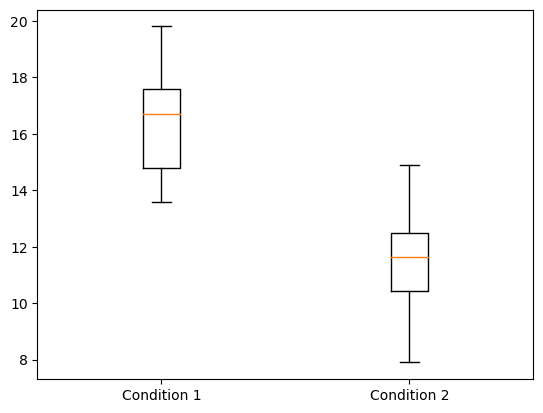

In [78]:
# Answer to point a
plt.boxplot([data1, data2], labels=['Condition 1', 'Condition 2'])
plt.show()

In [79]:
# make a dataframe with the major descriptive statistics and Q1, Q3
descriptive_stats = pd.DataFrame({'Supplier 1': [data1.mean(), data1.std(), data1.var(), data1.min(), data1.quantile(0.25), data1.median(), data1.quantile(0.75), data1.max()], 
                                    'Supplier 2': [data2.mean(), data2.std(), data2.var(), data2.min(), data2.quantile(0.25), data2.median(), data2.quantile(0.75), data2.max()]},
                                    index=['Mean', 'StDev', 'Var', 'Min', 'Q1', 'Median', 'Q3', 'Max'])

print(np.round(descriptive_stats,3))

        Supplier 1  Supplier 2
Mean        16.356      11.483
StDev        2.069       2.370
Var          4.283       5.618
Min         13.600       7.900
Q1          14.800      10.425
Median      16.700      11.650
Q3          17.600      12.500
Max         19.800      14.900


In [80]:
data.describe()

,cond1,cond2
count,9.000000,6.000000
mean,16.355556,11.483333
std,2.069487,2.370162
min,13.600000,7.900000
25%,14.800000,10.425000
50%,16.700000,11.650000
75%,17.600000,12.500000
max,19.800000,14.900000


### Point b

Compute the confidence interval on the variance ratio at 95%.

p-value Shapiro-Wilk test for condition 1: 0.865
p-value Shapiro-Wilk test for condition 2: 0.991


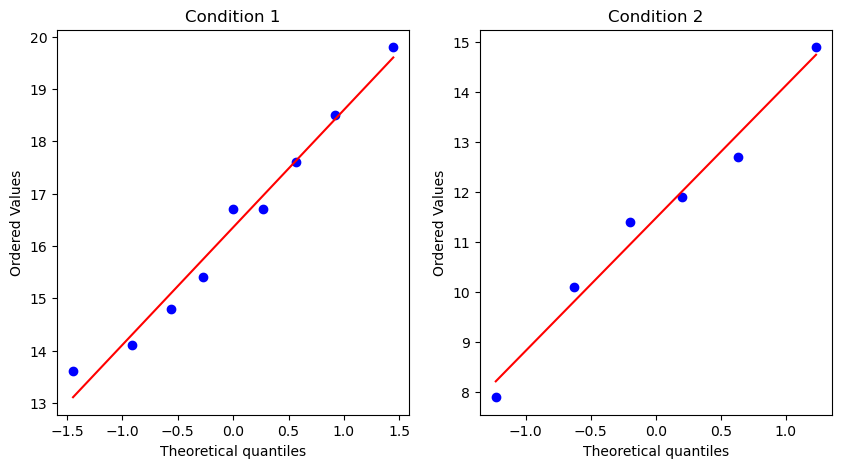

In [81]:
# Answer to point b
CL = 0.95      # Confidence level
alpha = 1 - CL # Significance level

# Check the assumptions
_, p_value_SW_1 = stats.shapiro(data1)
_, p_value_SW_2 = stats.shapiro(data2)
print('p-value Shapiro-Wilk test for condition 1: %.3f' % p_value_SW_1)
print('p-value Shapiro-Wilk test for condition 2: %.3f' % p_value_SW_2)

# QQ-plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
stats.probplot(data1, plot=ax[0])
ax[0].set_title('Condition 1')
stats.probplot(data2, plot=ax[1])
ax[1].set_title('Condition 2')
plt.show()

In [82]:
# Compute the CI on the variance ratio
F0 = data1.var() / data2.var()
CI = [F0 * stats.f.ppf(alpha/2, df2, df1), F0 * stats.f.ppf(1 - alpha/2, df2, df1)]
print('The confidence interval on the variance ratio is: [%.3f, %.3f]' % (CI[0], CI[1]))


The confidence interval on the variance ratio is: [0.113, 3.673]


In [83]:
# Compute the corresponding p-value
p_value = 2 * stats.f.cdf(F0, df1, df2)
print('The p-value is: %.3f' % p_value)

The p-value is: 0.697


### Point c

Compute the 99% confidence interval on mean difference.

In [84]:
# Answer to point c
CL = 0.99      # Confidence level
alpha = 1 - CL # Significance level

# Compute the pooled standard deviation
s_p = np.sqrt((data1.var() * df1 + data2.var() * df2) / (df1 + df2))

# Compute the CI on the difference of means
CI = [data1.mean() - data2.mean() - stats.t.ppf(1 - alpha/2, df1 + df2) * s_p * np.sqrt(1/n1 + 1/n2),
        data1.mean() - data2.mean() + stats.t.ppf(1 - alpha/2, df1 + df2) * s_p * np.sqrt(1/n1 + 1/n2)]

print('The confidence interval on the difference of means is: [%.3f, %.3f]' % (CI[0], CI[1]))

The confidence interval on the difference of means is: [1.395, 8.349]


In [86]:
# Compute the corresponding p-value
p_value = 2 * stats.t.cdf(-abs(data1.mean() - data2.mean()) / (s_p * np.sqrt(1/n1 + 1/n2)), df1 + df2)
print('The p-value is: %.3f' % p_value)

The p-value is: 0.001


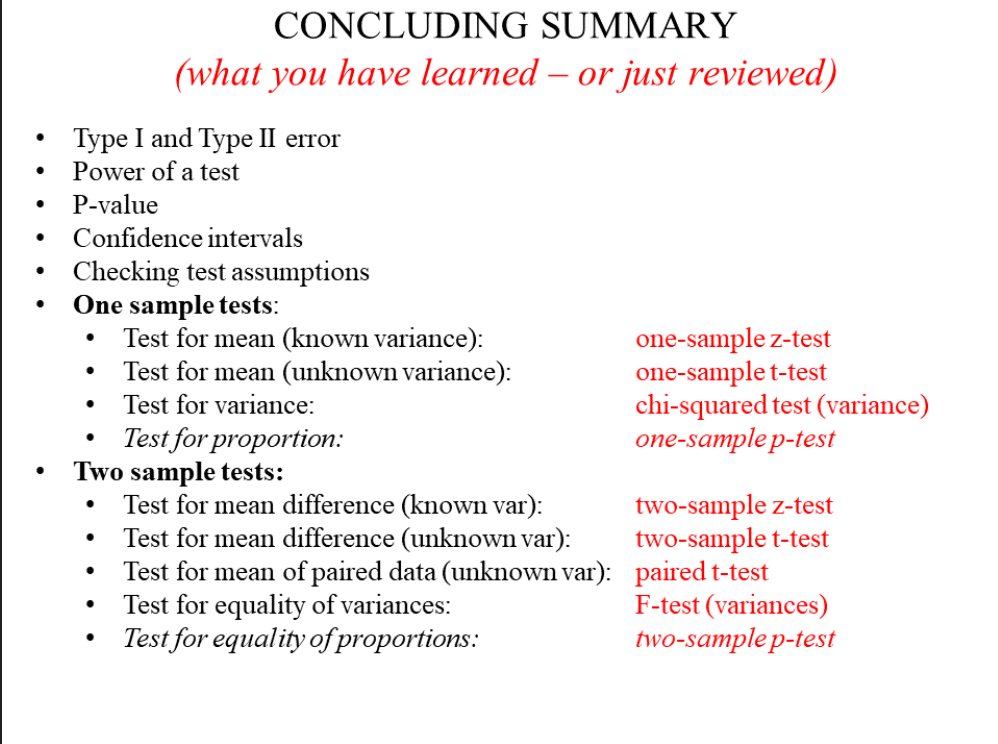